# DATA SET DETAILS

Data Set Size: 9568 observations

Duration: Collected over six years

Operating Condition: The power plant was set to work with a full load.

# Variables (Features)

temperature: Temperature in degrees Celsius.

exhaust_vacuum: Vacuum of the exhaust in cm Hg.

amb_pressure: Ambient pressure in millibar.

r_humidity: Relative humidity in percentage.

# Target Variable

energy_production: Net hourly electrical energy output in MW.

# IMPORT DATASET

In [1]:
    import pandas as pd
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression, Lasso, Ridge
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.ensemble import RandomForestRegressor
    from xgboost import XGBRegressor
    from sklearn.metrics import mean_squared_error, r2_score
    import warnings
    warnings.filterwarnings("ignore")


C:\Users\chakri\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
filepath="C:\\Users\\chakri\\Downloads\\energy_production.csv"
df=pd.read_csv(filepath,sep=';')

# Exploratory Data Analysis (EDA)

In [3]:
df.head()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature        9568 non-null   float64
 1   exhaust_vacuum     9568 non-null   float64
 2   amb_pressure       9568 non-null   float64
 3   r_humidity         9568 non-null   float64
 4   energy_production  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [5]:
df.describe()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [6]:
df.isnull().sum()

temperature          0
exhaust_vacuum       0
amb_pressure         0
r_humidity           0
energy_production    0
dtype: int64

In [7]:
df.shape

(9568, 5)

In [8]:
df[df.duplicated()].shape

(41, 5)

In [9]:
df[df.duplicated()]

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
2066,10.72,41.17,1019.68,60.71,479.21
2780,28.41,75.60,1018.48,56.07,440.28
3333,24.79,75.60,1017.07,68.23,440.05
3467,7.64,41.17,1020.01,75.14,488.53
3550,25.42,75.60,1017.39,77.63,438.24
3747,11.61,41.17,1019.57,58.82,476.81
4292,12.27,41.17,1019.41,58.10,475.13
4528,24.63,59.57,1010.45,85.36,440.67
5065,8.57,41.17,1020.18,72.47,484.20
5564,11.82,41.17,1019.50,55.74,475.61


In [10]:
df1 = df.drop_duplicates()

In [11]:
df1[df1.duplicated()]

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production


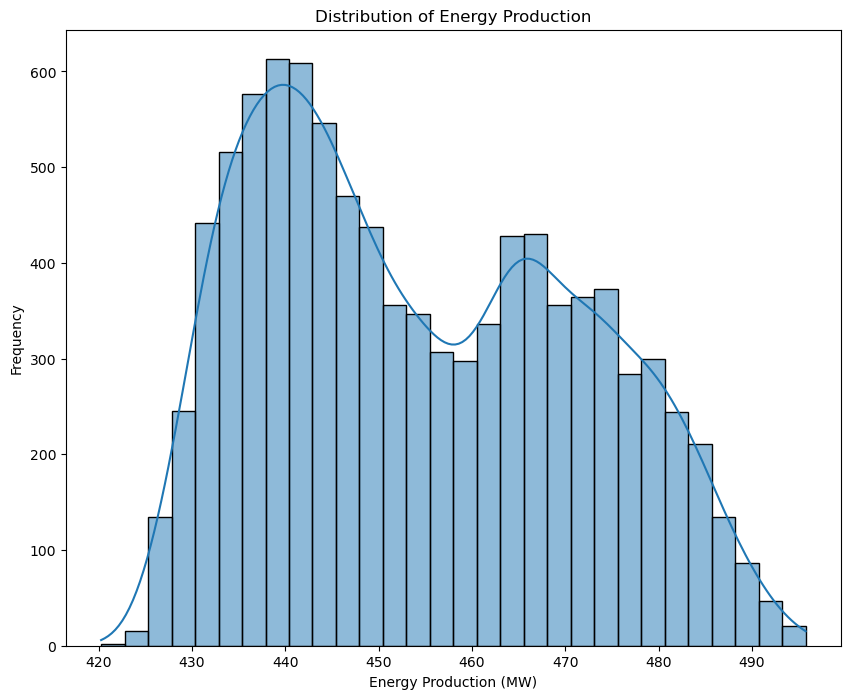

In [12]:
plt.figure(figsize=(10, 8))
sns.histplot(data=df1, x='energy_production', bins=30, kde=True)
plt.title('Distribution of Energy Production')
plt.xlabel('Energy Production (MW)')
plt.ylabel('Frequency')
plt.show()

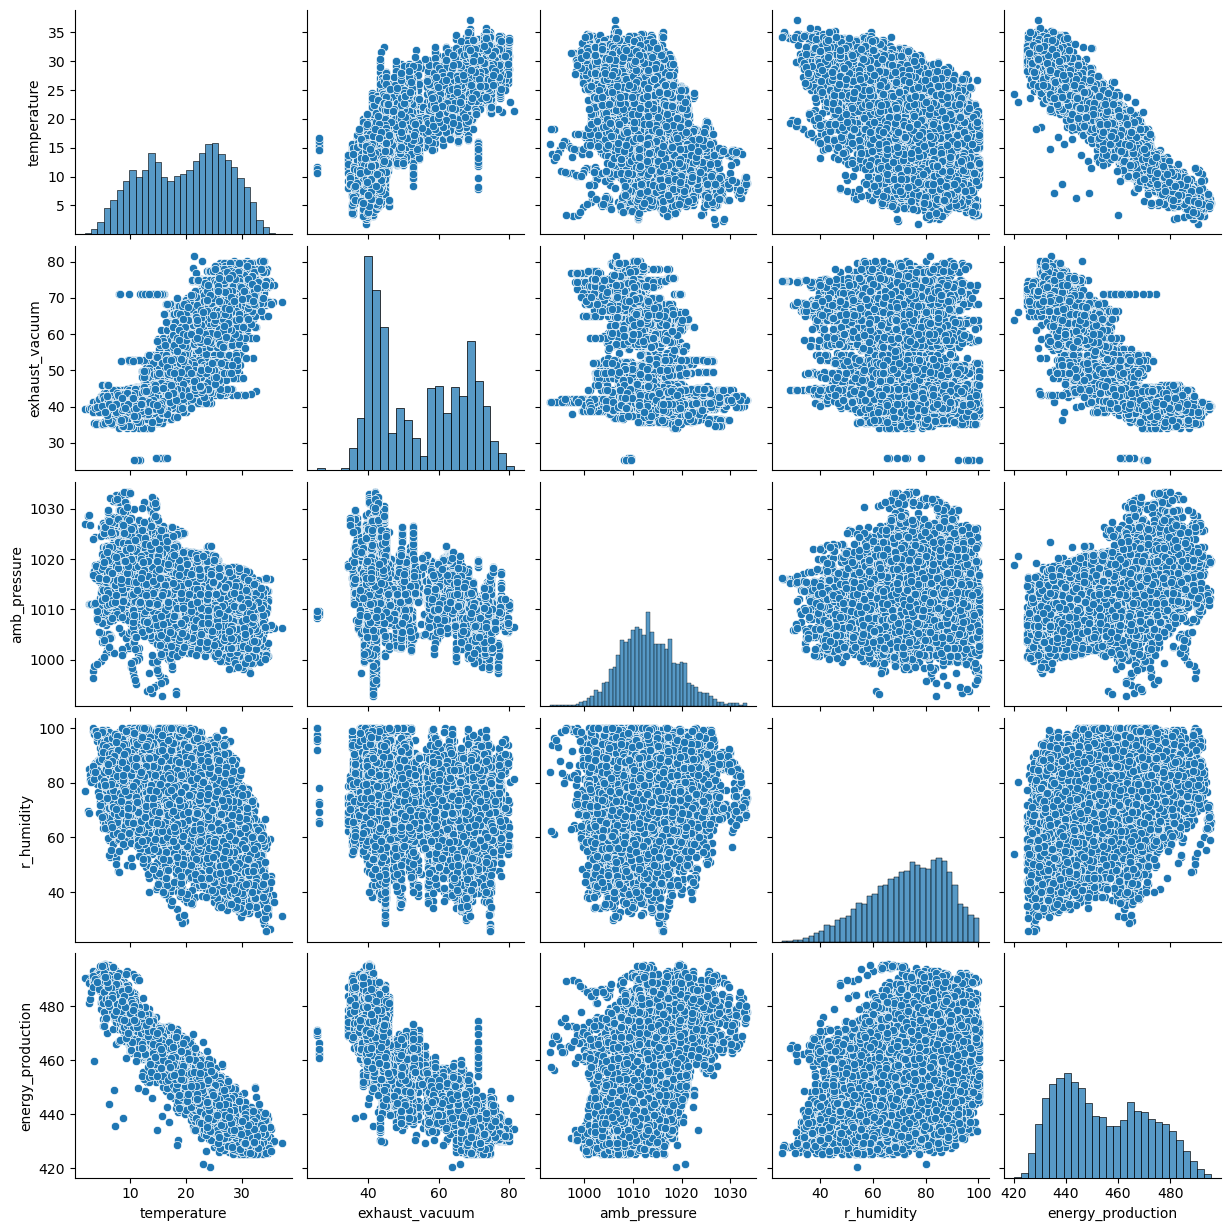

In [13]:
sns.pairplot(data=df)

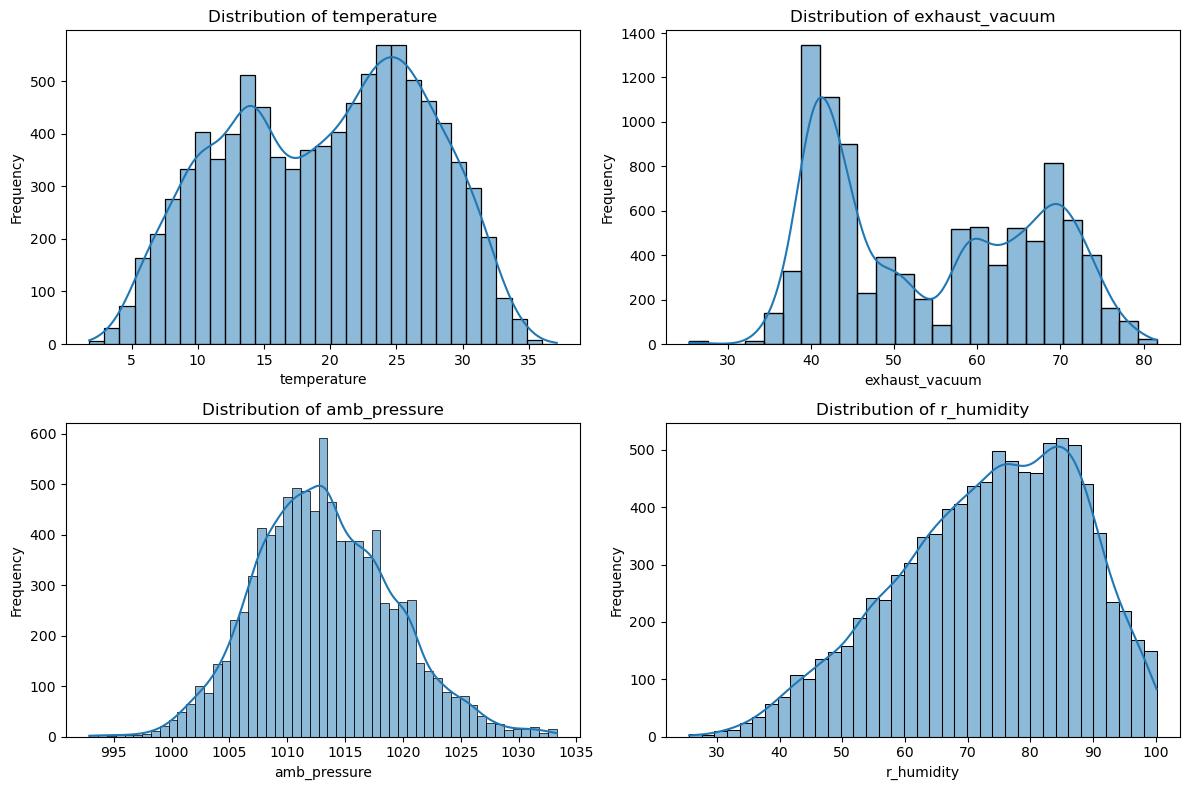

In [14]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(df1.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df1[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

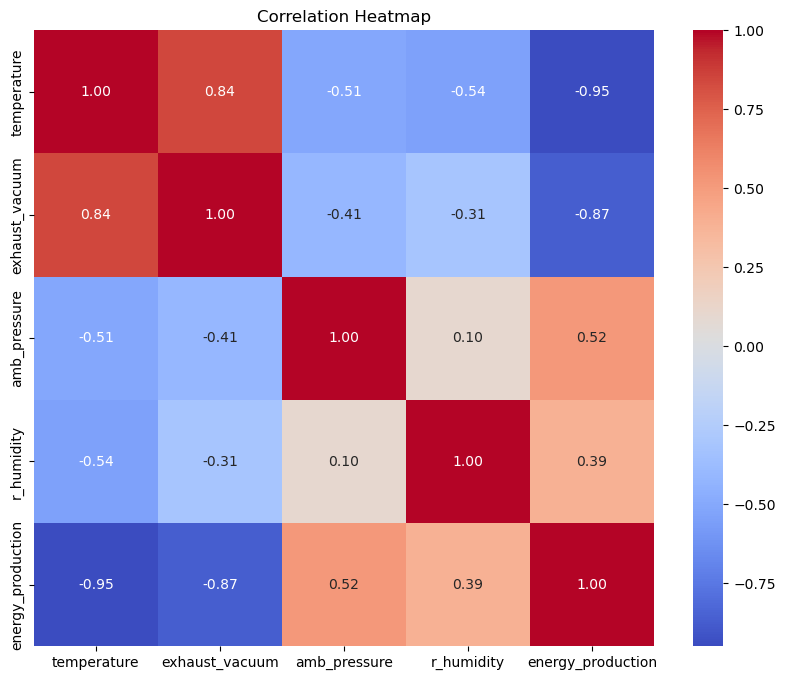

In [15]:
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [16]:
df.corr()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
temperature,1.000000,0.844107,-0.507549,-0.542535,-0.948128
exhaust_vacuum,0.844107,1.000000,-0.413502,-0.312187,-0.869780
amb_pressure,-0.507549,-0.413502,1.000000,0.099574,0.518429
r_humidity,-0.542535,-0.312187,0.099574,1.000000,0.389794
energy_production,-0.948128,-0.869780,0.518429,0.389794,1.000000


In [17]:
import pandas as pd
from scipy import stats

# Assuming your data is stored in a DataFrame named 'df1'

# Define the column for which you want to remove outliers
column_to_remove_outliers = 'r_humidity'

# Function to remove outliers using a combination of IQR and Z-score methods
def remove_outliers_combined(df, column, threshold_iqr=1.5, threshold_zscore=3):
    # Calculate IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate Z-scores
    z_scores = stats.zscore(df[column])
    
    # Identify outliers based on IQR and Z-score thresholds
    outliers_iqr = (df[column] < (Q1 - threshold_iqr * IQR)) | (df[column] > (Q3 + threshold_iqr * IQR))
    outliers_zscore = (z_scores < -threshold_zscore) | (z_scores > threshold_zscore)
    
    # Remove outliers
    df_filtered = df[~(outliers_iqr | outliers_zscore)]
    return df_filtered

# Remove outliers from the 'r_humidity' column using combined method
df1 = remove_outliers_combined(df1, column_to_remove_outliers)

# After removing outliers, you can proceed with further analysis or visualization


In [18]:
import pandas as pd
from scipy import stats

# Assuming your data is stored in a DataFrame named 'df1'

# Define the column for which you want to remove outliers
column_to_remove_outliers = 'amb_pressure'

# Function to remove outliers using a combination of IQR and Z-score methods
def remove_outliers_combined(df, column, threshold_iqr=1.5, threshold_zscore=3):
    # Calculate IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate Z-scores
    z_scores = stats.zscore(df[column])
    
    # Identify outliers based on IQR and Z-score thresholds
    outliers_iqr = (df[column] < (Q1 - threshold_iqr * IQR)) | (df[column] > (Q3 + threshold_iqr * IQR))
    outliers_zscore = (z_scores < -threshold_zscore) | (z_scores > threshold_zscore)
    
    # Remove outliers
    df_filtered = df[~(outliers_iqr | outliers_zscore)]
    return df_filtered

# Remove outliers from the 'r_humidity' column using combined method
df1 = remove_outliers_combined(df1, column_to_remove_outliers)

# After removing outliers, you can proceed with further analysis or visualization


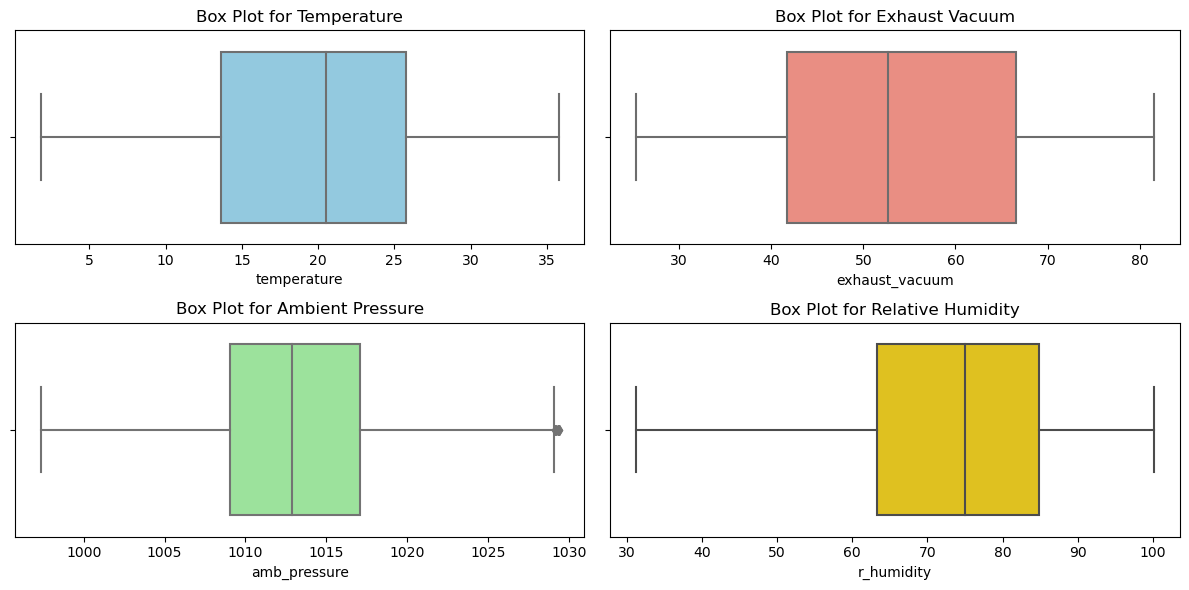

In [19]:
# Create box plots to check for outliers
plt.figure(figsize=(12, 6))

# Box plot for temperature
plt.subplot(2, 2, 1)
sns.boxplot(x=df1['temperature'], color='skyblue')
plt.title('Box Plot for Temperature')

# Box plot for exhaust vacuum
plt.subplot(2, 2, 2)
sns.boxplot(x=df1['exhaust_vacuum'], color='salmon')
plt.title('Box Plot for Exhaust Vacuum')

# Box plot for ambient pressure
plt.subplot(2, 2, 3)
sns.boxplot(x=df1['amb_pressure'], color='lightgreen')
plt.title('Box Plot for Ambient Pressure')

# Box plot for relative humidity
plt.subplot(2, 2, 4)
sns.boxplot(x=df1['r_humidity'], color='gold')
plt.title('Box Plot for Relative Humidity')

plt.tight_layout()
plt.show()


# MODEL EVALUATION

In [20]:
X = df1[['temperature', 'exhaust_vacuum', 'amb_pressure', 'r_humidity']]
y = df1['energy_production']

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
# Initialize and fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [23]:
# Initialize and fit the Lasso regression model
lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha parameter
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [24]:
# Initialize and fit the Ridge regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter
ridge_model.fit(X_train, y_train)

Ridge()

In [25]:
# Make predictions on the testing set for each model
linear_pred = linear_model.predict(X_test)
lasso_pred = lasso_model.predict(X_test)
ridge_pred = ridge_model.predict(X_test)

In [26]:
# Model Evaluation
# Calculate Mean Squared Error and R-squared for each model
linear_mse = mean_squared_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)


In [27]:
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

In [28]:
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

In [29]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [30]:
# Initialize and fit the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [31]:
# Initialize and fit the XGBoost Regressor model
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [32]:
# Make predictions on the testing set for each model
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

In [33]:
print("\nModel Evaluation:")
print("Linear Regression - Mean Squared Error:", linear_mse, "R-squared:", linear_r2)
print("Lasso Regression - Mean Squared Error:", lasso_mse, "R-squared:", lasso_r2)
print("Ridge Regression - Mean Squared Error:", ridge_mse, "R-squared:", ridge_r2)


Model Evaluation:
Linear Regression - Mean Squared Error: 22.383415434953484 R-squared: 0.9235573975602983
Lasso Regression - Mean Squared Error: 22.387832146770606 R-squared: 0.9235423138503743
Ridge Regression - Mean Squared Error: 22.383423071629593 R-squared: 0.9235573714799443


In [34]:
# Model Evaluation
# Calculate Mean Squared Error and R-squared for each model
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)

rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)

print("\nModel Evaluation:")
print("Decision Tree - Mean Squared Error:", dt_mse, "R-squared:", dt_r2)
print("Random Forest - Mean Squared Error:", rf_mse, "R-squared:", rf_r2)
print("XGBoost - Mean Squared Error:", xgb_mse, "R-squared:", xgb_r2)



Model Evaluation:
Decision Tree - Mean Squared Error: 20.93992594164456 R-squared: 0.928487123043148
Random Forest - Mean Squared Error: 11.918361957002608 R-squared: 0.9592970694101979
XGBoost - Mean Squared Error: 10.09531014749321 R-squared: 0.9655230551229809


In [35]:
# Showing predicted values for Linear Regression
print("\nPredicted values for Linear Regression:")
linear_results = pd.DataFrame({'Actual': y_test, 'Predicted': linear_pred})
print(linear_results.head())


Predicted values for Linear Regression:
      Actual   Predicted
3582  475.63  474.307846
4189  467.03  468.597311
4282  435.85  440.004900
3315  442.39  445.805575
5671  472.46  467.655335


In [36]:
# Showing predicted values for Lasso Regression
print("\nPredicted values for Lasso Regression:")
lasso_results = pd.DataFrame({'Actual': y_test, 'Predicted': lasso_pred})
print(lasso_results.head())



Predicted values for Lasso Regression:
      Actual   Predicted
3582  475.63  474.254561
4189  467.03  468.602667
4282  435.85  440.017133
3315  442.39  445.818247
5671  472.46  467.682204


In [37]:
# Showing predicted values for Ridge Regression
print("\nPredicted values for Ridge Regression:")
ridge_results = pd.DataFrame({'Actual': y_test, 'Predicted': ridge_pred})
print(ridge_results.head())



Predicted values for Ridge Regression:
      Actual   Predicted
3582  475.63  474.307774
4189  467.03  468.597376
4282  435.85  440.004870
3315  442.39  445.805612
5671  472.46  467.655326


In [38]:
# Showing predicted values for Decision Tree
print("\nPredicted values for Decision Tree:")
dt_results = pd.DataFrame({'Actual': y_test, 'Predicted': dt_pred})
print(dt_results.head())



Predicted values for Decision Tree:
      Actual  Predicted
3582  475.63     473.45
4189  467.03     464.45
4282  435.85     438.62
3315  442.39     443.78
5671  472.46     473.38


In [39]:
# Showing predicted values for Random Forest
print("\nPredicted values for Random Forest:")
rf_results = pd.DataFrame({'Actual': y_test, 'Predicted': rf_pred})
print(rf_results.head())



Predicted values for Random Forest:
      Actual  Predicted
3582  475.63   473.1853
4189  467.03   465.4784
4282  435.85   438.7063
3315  442.39   441.7346
5671  472.46   471.1566


In [40]:
# Showing predicted values for XGBoost
print("\nPredicted values for XGBoost:")
xgb_results = pd.DataFrame({'Actual': y_test, 'Predicted': xgb_pred})
print(xgb_results.head())


Predicted values for XGBoost:
      Actual   Predicted
3582  475.63  471.905151
4189  467.03  465.905243
4282  435.85  438.898834
3315  442.39  442.473114
5671  472.46  471.212646


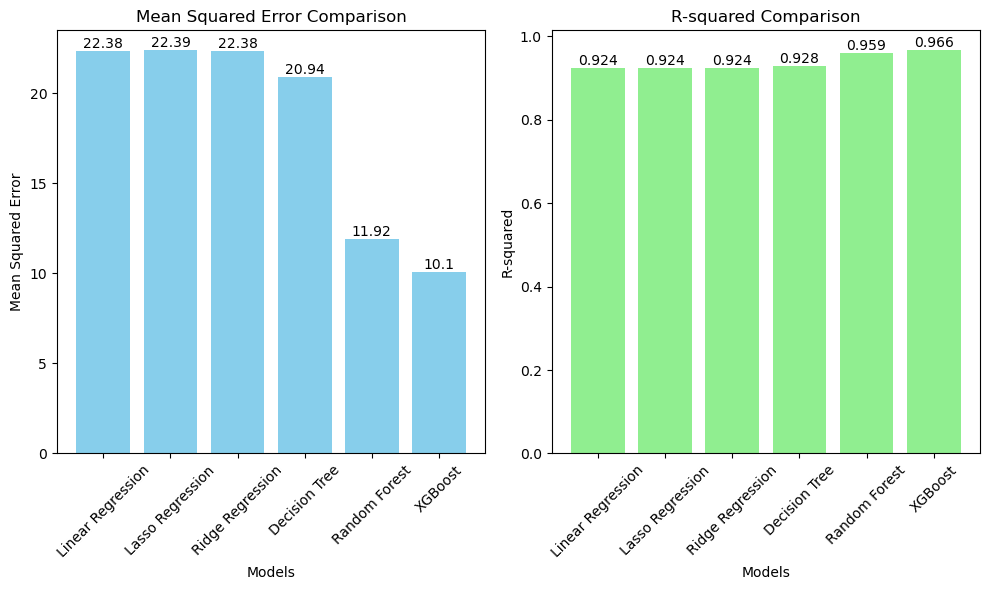

In [41]:
# Create a bar chart to compare model performance
models = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 
          'Decision Tree', 'Random Forest', 'XGBoost']
mse_values = [linear_mse, lasso_mse, ridge_mse, dt_mse, rf_mse, xgb_mse]
r2_values = [linear_r2, lasso_r2, ridge_r2, dt_r2, rf_r2, xgb_r2]

plt.figure(figsize=(10, 6))

# Plot Mean Squared Error
plt.subplot(1, 2, 1)
plt.bar(models, mse_values, color='skyblue')
plt.title('Mean Squared Error Comparison')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)
for i in range(len(models)):
    plt.text(i, mse_values[i], round(mse_values[i], 2), ha='center', va='bottom')

# Plot R-squared
plt.subplot(1, 2, 2)
plt.bar(models, r2_values, color='lightgreen')
plt.title('R-squared Comparison')
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.xticks(rotation=45)
for i in range(len(models)):
    plt.text(i, r2_values[i], round(r2_values[i], 3), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [42]:
# Showing predicted values for XGBoost
print("\nPredicted values for XGBoost:")
xgb_results = pd.DataFrame({'Actual': y_test, 'Predicted': xgb_pred})
print(xgb_results.head())


Predicted values for XGBoost:
      Actual   Predicted
3582  475.63  471.905151
4189  467.03  465.905243
4282  435.85  438.898834
3315  442.39  442.473114
5671  472.46  471.212646


In [43]:
pip install Flask

In [44]:
pip install streamlit

     ---------------------------------------- 8.1/8.1 MB 4.6 MB/s eta 0:00:00
     -------------------------------------- 207.3/207.3 kB 6.4 MB/s eta 0:00:00
     -------------------------------------- 857.8/857.8 kB 5.4 MB/s eta 0:00:00
     ---------------------------------------- 24.8/24.8 MB 4.4 MB/s eta 0:00:00
     ---------------------------------------- 4.8/4.8 MB 5.6 MB/s eta 0:00:00
     ---------------------------------------- 62.7/62.7 kB 3.5 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 8.0.1
    Uninstalling tenacity-8.0.1:
      Successfully uninstalled tenacity-8.0.1
Note: you may need to restart the kernel to use updated packages.


['trained_model.pkl']

In [59]:
pip install streamlit


Note: you may need to restart the kernel to use updated packages.


In [70]:
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Assuming X and y are your features and target variable
# X should contain the feature columns and y should contain the target variable column

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train your model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Save the trained model
joblib.dump(model, 'trained_model.pkl')


['trained_model.pkl']

In [78]:
import streamlit as st
import joblib

# Load the trained model
model = joblib.load("trained_model.pkl")

# Define the Streamlit app
def main():
    # Set title and description
    st.title('Energy Production Prediction')
    st.write('Enter the input features to predict energy production.')

    # Input form for user to enter feature values
    temperature = st.number_input('Temperature (°C)')
    exhaust_vacuum = st.number_input('Exhaust Vacuum (cm Hg)')
    amb_pressure = st.number_input('Ambient Pressure (millibar)')
    r_humidity = st.number_input('Relative Humidity (%)')

    # Predict button
    if st.button('Predict'):
        try:
            # Make prediction using the loaded model
            prediction = model.predict([[temperature, exhaust_vacuum, amb_pressure, r_humidity]])
            st.write(f'Predicted Energy Production: {prediction[0]} MW')
        except Exception as e:
            st.error(f"Error predicting energy production: {e}")
            print(f"Error predicting energy production: {e}")  # Print error for debugging

# Run the Streamlit app
if __name__ == "__main__":
    main


In [81]:
main()
